# An example of an optimal pruning based routing algorithm
- based on a simple graph and Dijkstra's algorithm with concave cost function
- Create a simple graph with multiple edge's attributes
    - weight = w_ij
    - concave = c_ij where i,j is nodes
- Use a dictionary for edge attributes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Define functions

In [2]:
def add_multi_link_attributes(G,attr1,attr2):
    """
    This funtion is to add the multiple link attributes to graph G
    input: G : graph
            attr1 : link attribute 1
            attr2 : link attribute 2
    output : G
    """
    i = 0
    for (u, v) in G.edges():
        G.add_edge(u,v,w=attr1[i],c=attr2[i])
        i = i+1 
        print(G.edges())
    return G


In [3]:

def add_node_cost(G,dict_attr, attr_name):
    """
    This function is to add a node cost (e.g., CPU utilization) from a dictionary of node attributes
    input : G : graph
            dict_attr : node attribute e.g., dictionary = {1:'a', 2:'b', 3:'c', 4:'d'}
            attr_name : 'cpu_util'
    """
    
    G.add_nodes_from(dict_attr.keys())
    for key,n in G.nodes.items():
       n[attr_name]=dict_attr[key]
    
    return G

In [4]:
def add_dict_link_attributes(G,dict_attr1,attr_name1):
    """
    This funtion is to add the multiple link attributes to graph G from the dictionary
    
    dict_attr1 = {('edge1', 'superedge'): 1, ('edge2', 'superedge'): 1, 
        ('edge3', 'superedge'): 1, ('edge1', 'edge2'): 1, ('edge2', 'edge3'): 1, 
        ('edge4', 'edge1'):1, ('edge5', 'edge2'):1, ('edge6', 'edge3'):1, 
        ('edge4', 'edge5'):1, ('edge5', 'edge6'):1}
        
    attr_name1 = 'concave'
    """
    for key,n in G.edges.items():
        if key in link_concave_edge_dict:
            n[attr_name1]=link_concave_edge_dict[key]
        else:
            new_key = (key[1],key[0])
       
            n[attr_name1]=link_concave_edge_dict[new_key]
    return G
        
    

In [5]:
def draw_graph(G,pos):
    """
    This function is to draw a graph with the fixed position
    input : G : graph
            pos: postions of all nodes with the dictionary of coordinates (x,y)
    """
    edge_labels = {}  ## add edge lables from edge attribute
    for u, v, data in G.edges(data=True):
        edge_labels[u, v] = data

    nx.draw_networkx(G,pos)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

In [6]:
def remove_Edge(G,rm_edge_list):
    """
    This function is to remove edges in the rm_edge_list from G
    """
    G.remove_edges_from(rm_edge_list)
    G.edges()
    return G
    

In [7]:
def compare_path(path1,path2):
    
    if collections.Counter(path1) == collections.Counter(path2):
        print ("The lists l1 and l2 are the same") 
        flag = True
    else: 
        print ("The lists l1 and l2 are not the same") 
        flag = False
    return flag

In [8]:
def additive_path_cost(G, path, attr):
    """
    This function is to find the path cost based on the additive costs
    : Path_Cost = sum_{edges in the path}attr[edge]
    Input : G : graph
            path : path is a list of nodes in the path
            attr : attribute of edges
    output : path_cost
    """
    return sum([G[path[i]][path[i+1]][attr] for i in range(len(path)-1)])

In [9]:
## Calculate concave path cost from attr
def max_path_cost(G, path, attr):
    """
    This function is to find the path cost based on the Concave costs
    : Path_Cost = max{edges in the path}attr[edge]
    Input : G : graph
            path : path is a list of nodes in the path
            attr : attribute of edges
    output : path_cost
    """
    return max([G[path[i]][path[i+1]][attr] for i in range(len(path)-1)])

In [10]:
def rm_edge_constraint(G,Cons):
    rm_edge_list = []
    for u, v, data in G.edges(data=True):
        e = (u,v)
        cost = G.get_edge_data(*e)
        print(cost)
        if cost['c'] >= Cons:
            rm_edge_list.append(e)
            print(rm_edge_list)
    
    remove_Edge(G,rm_edge_list)

    return G

In [11]:
def has_path(G, source, target):
    """Return True if G has a path from source to target, False otherwise.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path
    """
    try:
        sp = nx.shortest_path(G,source, target)
    except nx.NetworkXNoPath:
        return False
    return True


In [12]:
def Optimum_prun_based_routing(G,S,D,L):
    """
    This function is to find the optimal path from S to D with constraint L 
    Input : G : graph
            S : Source
            D : Destination
            L : constraint
    """
    
    if has_path(G, S, D):
        
        Shortest_path = nx.dijkstra_path(G, S, D, weight='w')
        Opt_path = Shortest_path
        while len(Shortest_path) != 0:
            path_cost = additive_path_cost(G, Shortest_path, 'w') 
            print(path_cost)
            if path_cost <= L:
                """go to concave cost"""
                PathConcave_cost  = max_path_cost(G, Shortest_path, 'c')
                G = rm_edge_constraint(G,PathConcave_cost) # remove all links where the concave link is greater than PathConcave_cost
            
                Opt_path = Shortest_path
                if has_path(G, S, D):
                    Shortest_path = nx.dijkstra_path(G, S, D, weight='w')
                else:
                    Shortest_path = []
            
            else:
                pass 
    else:
        print('No path from', S, ' to ', D)
        Opt_path = []
    return Opt_path
        
        
        

## Create a graph

In [13]:
G = nx.Graph()
edge_list = [('edge1', 'superedge'), ('edge2', 'superedge'), 
                    ('edge3', 'superedge'), ('edge1', 'edge2'), ('edge2', 'edge3'), 
                    ('edge4', 'edge1'), ('edge5', 'edge2'), ('edge6', 'edge3'), 
                    ('edge4', 'edge5'), ('edge5', 'edge6')]

link_weight_list =[('edge1', 'superedge', 1), ('edge2', 'superedge', 1), 
        ('edge3', 'superedge', 1), ('edge1', 'edge2', 1), ('edge2', 'edge3', 1), 
        ('edge4', 'edge1',1), ('edge5', 'edge2',1), ('edge6', 'edge3',1), 
        ('edge4', 'edge5',1), ('edge5', 'edge6',1)]
link_weight_edge_dict = {('edge1', 'superedge'): 1, ('edge2', 'superedge'): 1, 
        ('edge3', 'superedge'): 1, ('edge1', 'edge2'): 1, ('edge2', 'edge3'): 1, 
        ('edge4', 'edge1'):1, ('edge5', 'edge2'):1, ('edge6', 'edge3'):1, 
        ('edge4', 'edge5'):1, ('edge5', 'edge6'):1}


link_concave_edge_dict = {('edge1', 'superedge'): 1, ('edge2', 'superedge'): 3, 
        ('edge3', 'superedge'): 3, ('edge1', 'edge2'): 1, ('edge2', 'edge3'): 4, 
        ('edge4', 'edge1'):3, ('edge5', 'edge2'):1, ('edge6', 'edge3'):1, 
        ('edge4', 'edge5'):2, ('edge5', 'edge6'):3} 


node_cpu_dict = {'superedge':6,'edge1':2,'edge2':1,'edge3':2,'edge4':3,'edge5':4,'edge6':3}

pos = {'superedge': (50, 100), 'edge1': (0, 50), 'edge2': (50, 50), 'edge3': (100,50), 'edge4': (0, 0), 'edge5': (50, 0), 'edge6': (100, 0)}

G.add_edges_from(edge_list)
#G.add_weighted_edges_from(link_weight_list)



In [14]:
attr_name = 'cpu_util'
G = add_node_cost(G,node_cpu_dict, attr_name)

In [15]:
attr_name1 = 'c'
G = add_dict_link_attributes(G,link_concave_edge_dict,attr_name1)
    

In [16]:
attr_name1 = 'w'
G = add_dict_link_attributes(G,link_weight_edge_dict,attr_name1)
    

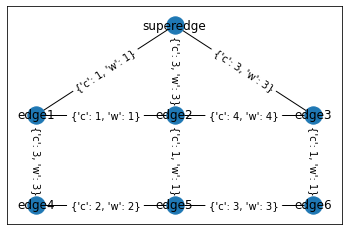

In [17]:

draw_graph(G,pos)

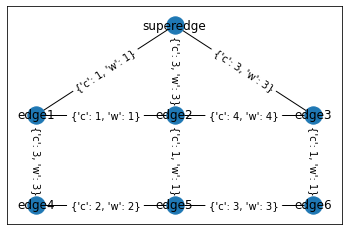

In [18]:
H = G.copy() # Copy a graph
draw_graph(H,pos)


# Find optimal pruning path


In [19]:
Opt_path= Optimum_prun_based_routing(H,'edge3','superedge',15)

3
{'c': 1, 'w': 1}
{'c': 1, 'w': 1}
{'c': 3, 'w': 3}
[('edge1', 'edge4')]
{'c': 3, 'w': 3}
[('edge1', 'edge4'), ('superedge', 'edge2')]
{'c': 3, 'w': 3}
[('edge1', 'edge4'), ('superedge', 'edge2'), ('superedge', 'edge3')]
{'c': 4, 'w': 4}
[('edge1', 'edge4'), ('superedge', 'edge2'), ('superedge', 'edge3'), ('edge2', 'edge3')]
{'c': 1, 'w': 1}
{'c': 1, 'w': 1}
{'c': 2, 'w': 2}
{'c': 3, 'w': 3}
[('edge1', 'edge4'), ('superedge', 'edge2'), ('superedge', 'edge3'), ('edge2', 'edge3'), ('edge5', 'edge6')]


In [20]:
print(Opt_path)

['edge3', 'superedge']


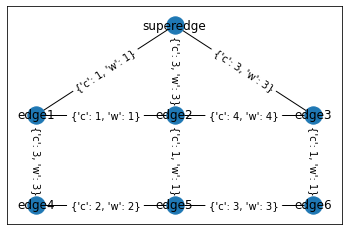

In [21]:
draw_graph(G,pos)

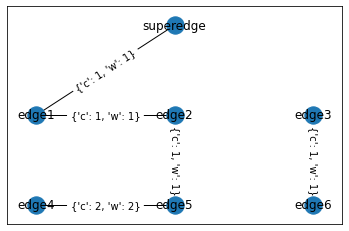

In [22]:
draw_graph(H,pos)